In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [121]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [122]:
df.info() # information of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [123]:
df.isna().sum() # presence of null values in the dataset

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [124]:
df.describe() # statistics of whole dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [125]:
df.age.unique() # returns unique values of age column

array([75.   , 55.   , 65.   , 50.   , 90.   , 60.   , 80.   , 62.   ,
       45.   , 49.   , 82.   , 87.   , 70.   , 48.   , 68.   , 53.   ,
       95.   , 58.   , 94.   , 85.   , 69.   , 72.   , 51.   , 57.   ,
       42.   , 41.   , 67.   , 79.   , 59.   , 44.   , 63.   , 86.   ,
       66.   , 43.   , 46.   , 61.   , 81.   , 52.   , 64.   , 40.   ,
       60.667, 73.   , 77.   , 78.   , 54.   , 47.   , 56.   ])

In [126]:
df.age.value_counts() # returns count of each age group

age
60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
58.000    10
53.000    10
63.000     8
80.000     7
72.000     7
42.000     7
40.000     7
85.000     6
68.000     5
62.000     5
52.000     5
61.000     4
49.000     4
73.000     4
51.000     4
59.000     4
69.000     3
46.000     3
82.000     3
90.000     3
64.000     3
48.000     2
78.000     2
95.000     2
57.000     2
54.000     2
77.000     2
67.000     2
66.000     2
44.000     2
60.667     2
87.000     1
79.000     1
41.000     1
94.000     1
86.000     1
81.000     1
43.000     1
47.000     1
56.000     1
Name: count, dtype: int64

### 1. What is the distribution of age among heart failure patients in the dataset ?

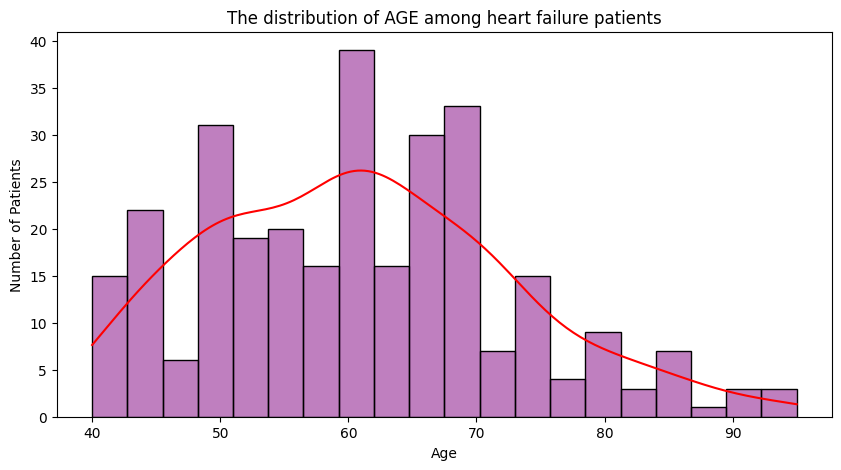

Mean Age : 60.83389297658862
Median Age : 60.0
Mode Age : 0    60.0
Name: age, dtype: float64


In [127]:
# Plot
plt.figure(figsize=(10,5))
ax = sns.histplot(df.age, kde=True, bins=20, color="purple")
ax.lines[0].set_color('red') # change the color of kde
plt.title("The distribution of AGE among heart failure patients")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.show()

# Calculate Statistics
mean_age = df.age.mean()
median_age = df.age.median()
mode_age = df.age.mode()

print("Mean Age :", mean_age)
print("Median Age :", median_age)
print("Mode Age :", mode_age)

### 2. How does the death rate vary with age ?

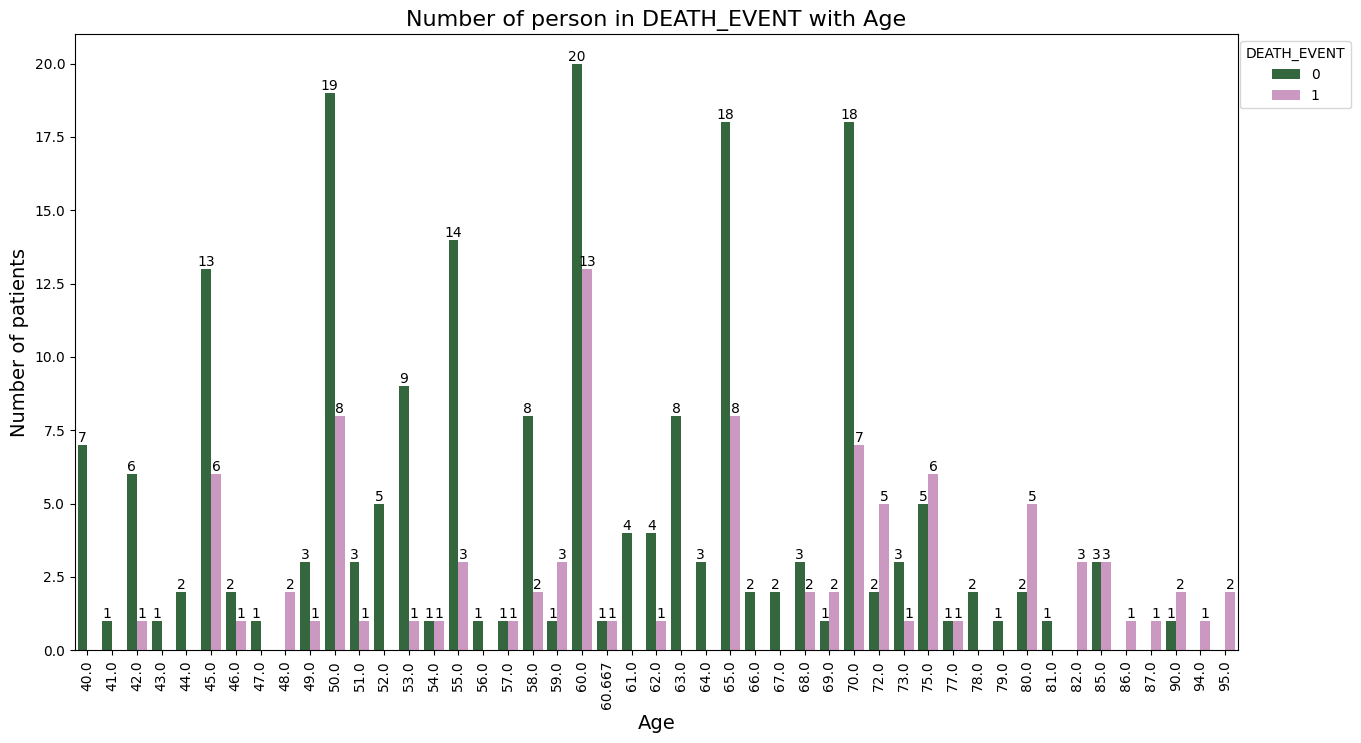

In [128]:
# Plotting number person in Death_event with each age

#Plot
plt.figure(figsize=(15,8))
fig = sns.countplot(x=df['age'], hue='DEATH_EVENT', data=df, palette = "cubehelix")
plt.title('Number of person in DEATH_EVENT with Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of patients', fontsize=14)
plt.xticks(rotation= 90)

plt.legend(title='DEATH_EVENT', loc='upper center', bbox_to_anchor=(1, 0, 0.1, 1))

for bars in fig.containers:
    fig.bar_label(bars)

plt.show()

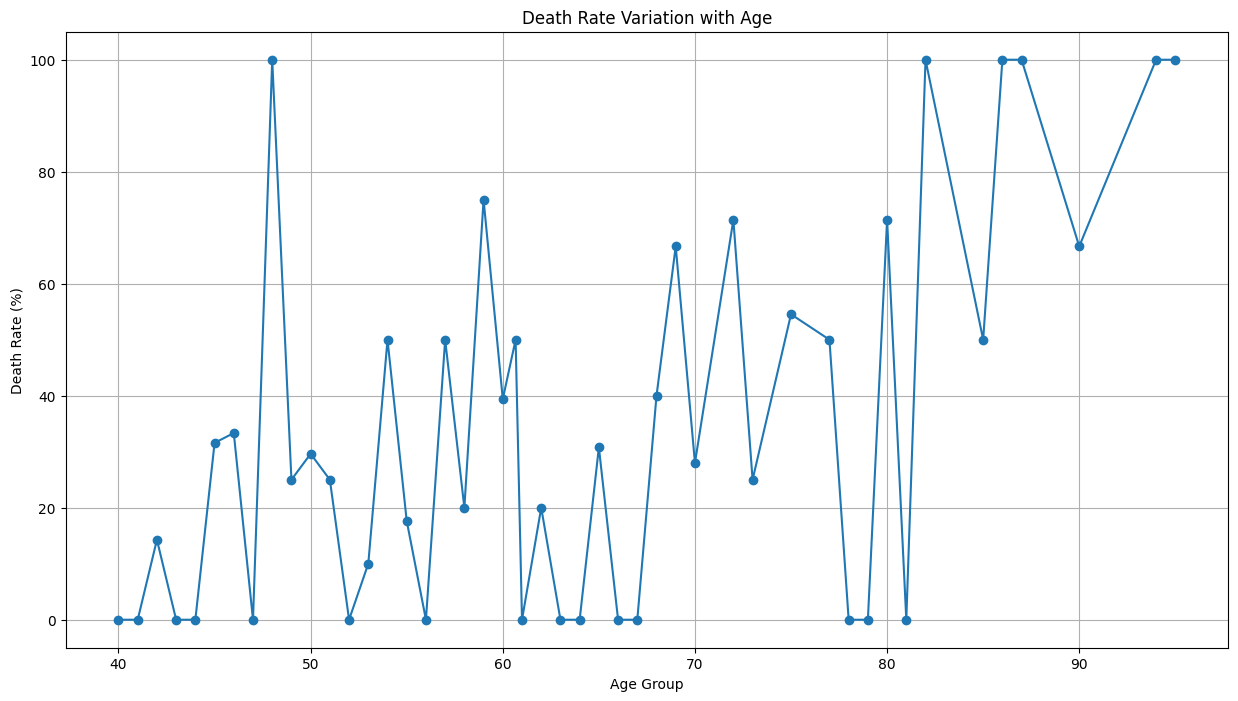

In [129]:
#Ploting the death rate variation with each age 

age_groups = df.groupby(df['age']).mean()
death_rate = age_groups['DEATH_EVENT'] * 100  # Convert to percentage

# Plot
plt.figure(figsize=(15,8))
plt.plot(death_rate.index, death_rate.values, marker='o', linestyle='-')
plt.xlabel('Age Group')
plt.ylabel('Death Rate (%)')
plt.title('Death Rate Variation with Age')
plt.grid(True)
plt.show()

In [130]:
death_rate = df.groupby('age')['DEATH_EVENT'].mean() * 100
death_rate # finding the death rate among the patients

age
40.000      0.000000
41.000      0.000000
42.000     14.285714
43.000      0.000000
44.000      0.000000
45.000     31.578947
46.000     33.333333
47.000      0.000000
48.000    100.000000
49.000     25.000000
50.000     29.629630
51.000     25.000000
52.000      0.000000
53.000     10.000000
54.000     50.000000
55.000     17.647059
56.000      0.000000
57.000     50.000000
58.000     20.000000
59.000     75.000000
60.000     39.393939
60.667     50.000000
61.000      0.000000
62.000     20.000000
63.000      0.000000
64.000      0.000000
65.000     30.769231
66.000      0.000000
67.000      0.000000
68.000     40.000000
69.000     66.666667
70.000     28.000000
72.000     71.428571
73.000     25.000000
75.000     54.545455
77.000     50.000000
78.000      0.000000
79.000      0.000000
80.000     71.428571
81.000      0.000000
82.000    100.000000
85.000     50.000000
86.000    100.000000
87.000    100.000000
90.000     66.666667
94.000    100.000000
95.000    100.000000
Name: DEA

In [131]:
# Group ages by decade
df['age_group'] = (df['age'] // 10) * 10  

# Calculate death rate for each age group
death_rate = df.groupby('age_group')['DEATH_EVENT'].mean() * 100

death_rate

age_group
40.0    23.404255
50.0    24.390244
60.0    29.032258
70.0    38.461538
80.0    68.421053
90.0    83.333333
Name: DEATH_EVENT, dtype: float64

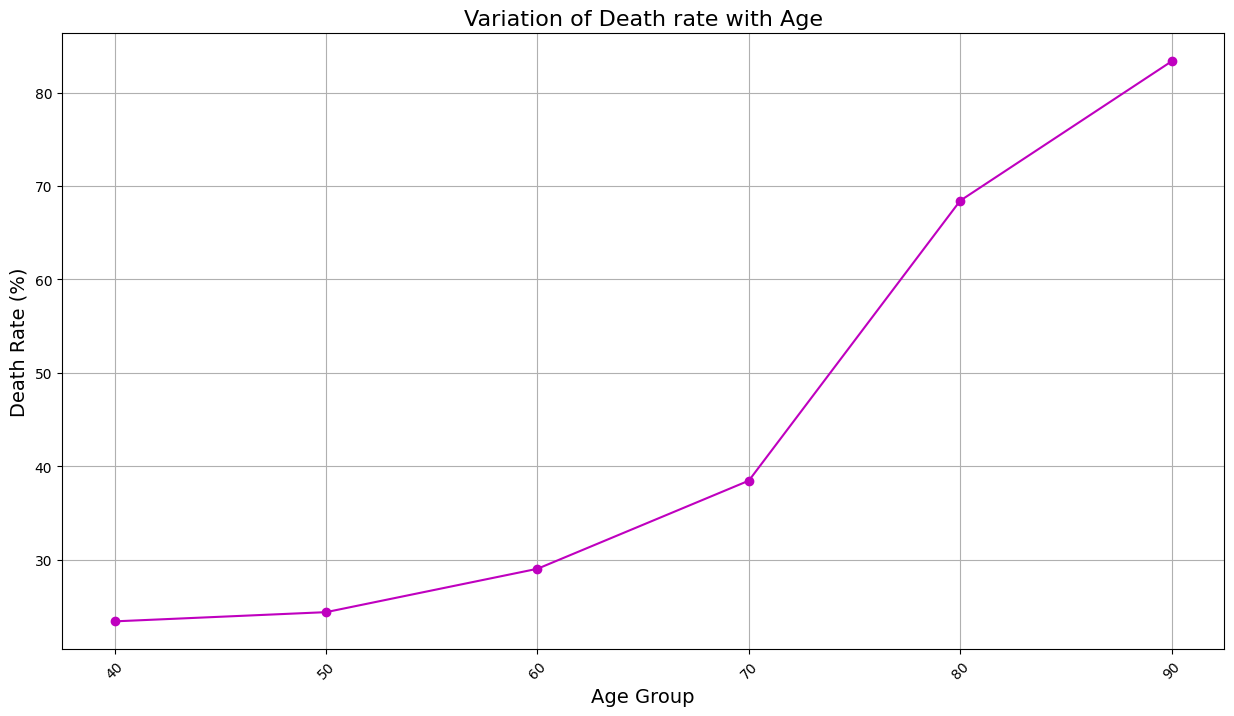

In [132]:
# Plot
plt.figure(figsize=(15,8))
plt.plot(death_rate.index, death_rate.values, marker='o', linestyle='-', color='m')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Death Rate (%)',fontsize=14)
plt.title('Variation of Death rate with Age', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 3. What is the percentage of male and female patients in the dataset?

sex
1    194
0    105
Name: count, dtype: int64


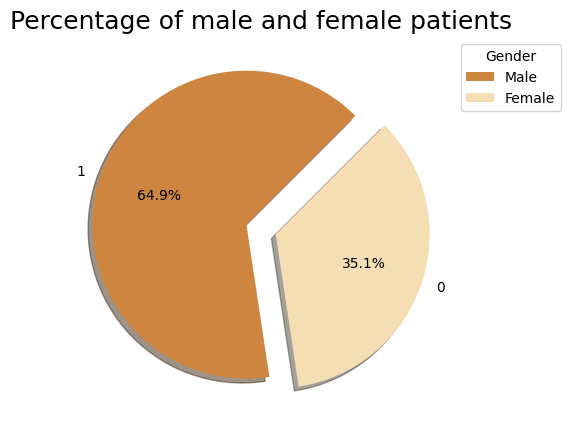

In [133]:
# Printing the values of male and females patients ( 0 for female, 1 for male)
print(df['sex'].value_counts())

#Plot
plt.figure(figsize=(12,5))
time = df['sex'].value_counts().index
no_of_student = df['sex'].value_counts().values
plt.pie(no_of_student, labels=time, explode=[0.1,0.1], colors=['peru','wheat'], autopct='%0.1f%%', shadow=True, startangle=45) 
plt.title("Percentage of male and female patients", fontsize=18)
plt.legend(title="Gender", loc='upper left',labels=['Male', 'Female'], bbox_to_anchor=(1, 0, 0.7, 1))
plt.show()

### 4. How does the palette count vary among different age groups ?

In [134]:
df['platelets'].describe() # statistics of platelets count 

count       299.000000
mean     263358.029264
std       97804.236869
min       25100.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      850000.000000
Name: platelets, dtype: float64

In [135]:
 # statistics of platelets count among different age groups 
df.groupby('age_group')['platelets'].describe()

,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
40.0,47.0,285931.705319,141518.402154,87000.0,222000.0,263358.030,326500.0000,850000.0
50.0,82.0,265001.807073,83484.172827,70000.0,218250.0,263358.030,317750.0000,504000.0
60.0,93.0,248990.840645,76019.870854,62000.0,204000.0,254000.000,286000.0000,497000.0
70.0,52.0,267036.349038,101173.880709,25100.0,222250.0,259179.015,296000.0000,621000.0
80.0,19.0,252248.213684,105430.556160,47000.0,189000.0,243000.000,313500.0000,507000.0
90.0,6.0,290059.671667,109798.700540,196000.0,209500.0,244679.015,358339.5075,461000.0


<Figure size 1500x800 with 0 Axes>

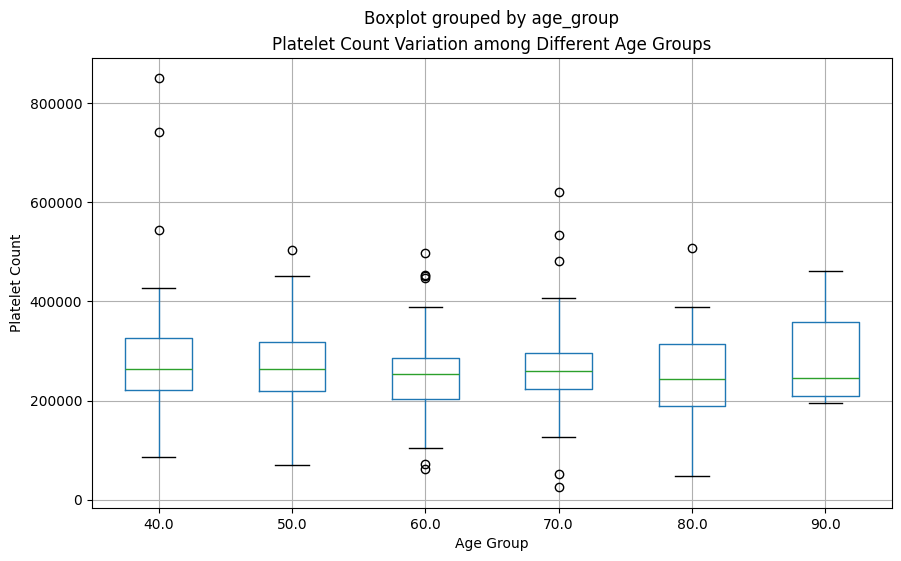

In [136]:
plt.figure(figsize=(15,8))

# Boxplot
df.boxplot(column='platelets', by='age_group', figsize=(10, 6))
plt.xlabel('Age Group')
plt.ylabel('Platelet Count')
plt.title('Platelet Count Variation among Different Age Groups')
plt.show()

In [137]:
platelets_rates = df.groupby('age_group')['platelets'].mean()
pd.DataFrame(platelets_rates)

,platelets
age_group,
40.0,285931.705319
50.0,265001.807073
60.0,248990.840645
70.0,267036.349038
80.0,252248.213684
90.0,290059.671667


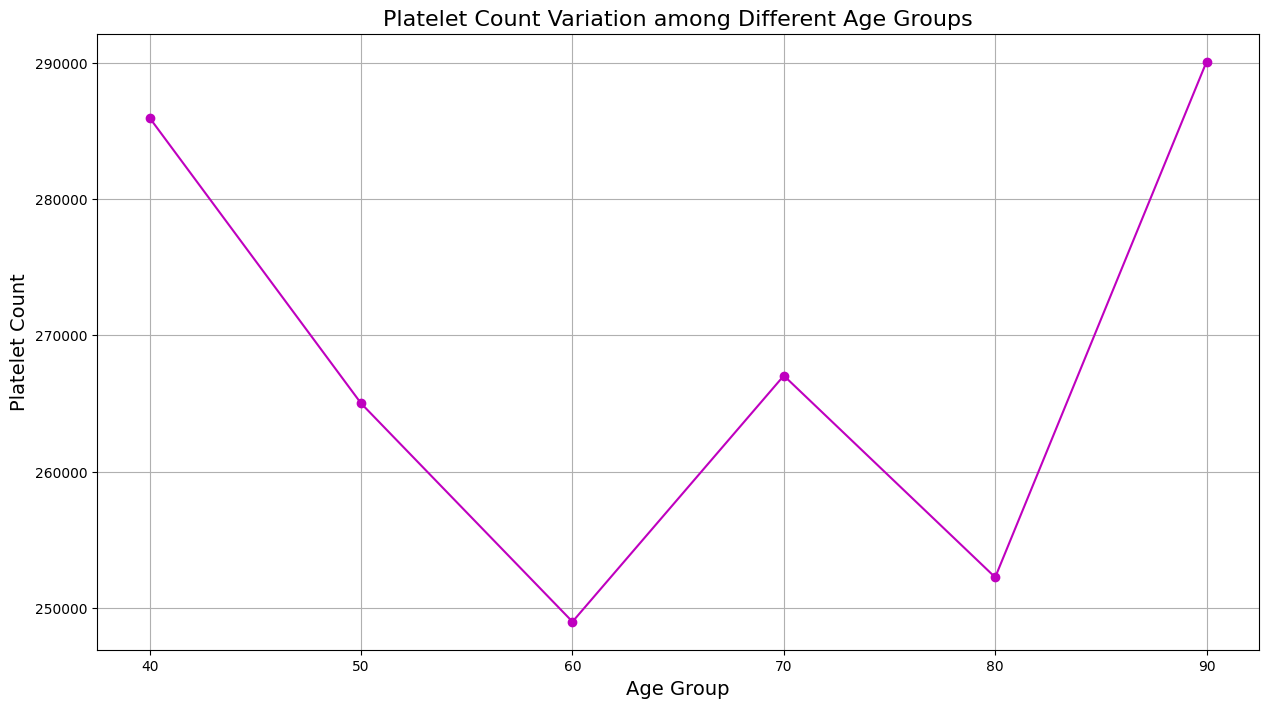

In [138]:
# Plot
plt.figure(figsize=(15,8))
plt.plot(platelets_rates.index, platelets_rates.values, marker='o', linestyle='-', color='m')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Platelet Count',fontsize=14)
plt.title('Platelet Count Variation among Different Age Groups', fontsize=16)
plt.grid(True)
plt.show()

### 5.  Is there a correlation between creatinine and sodium levels in the blood?

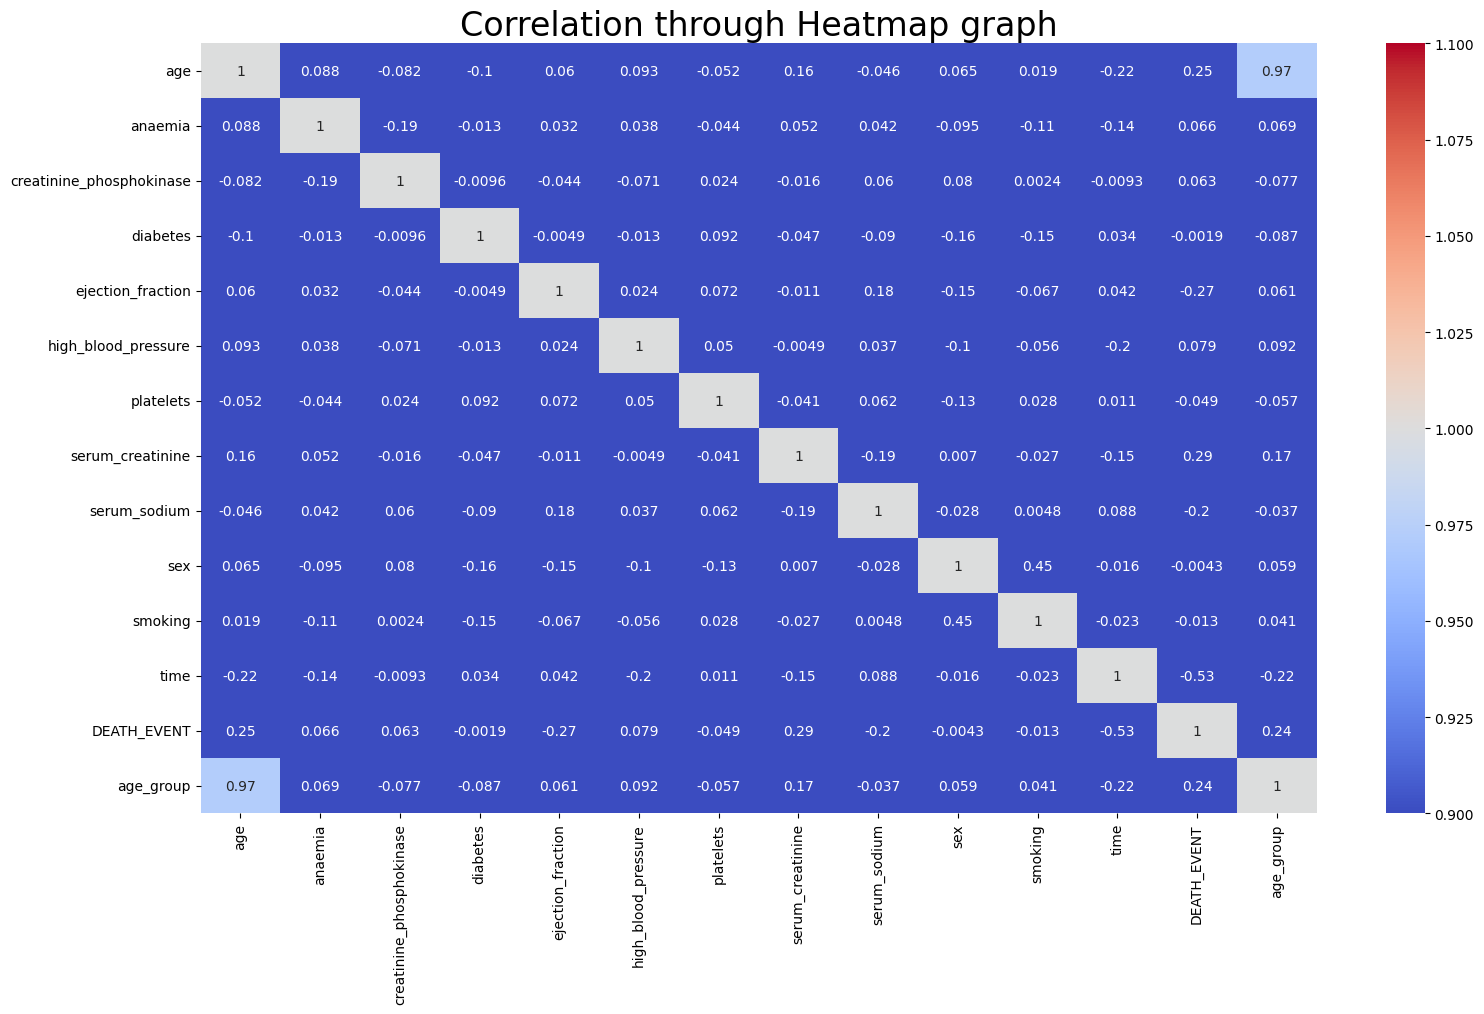

In [139]:
#Correlation Plot of whole dataset

#plot
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True, vmin=1.0, cmap='coolwarm')
plt.title('Correlation through Heatmap graph', fontsize=24)
plt.show()

In [140]:
# Calculate correlation coefficient of creatinine and sodium levels in the blood

print("Correlation coefficient of creatinine and sodium levels in the blood : ")
print(df['serum_creatinine'].corr(df['serum_sodium'])) 

Correlation coefficient of creatinine and sodium levels in the blood : 
-0.18909521009117392


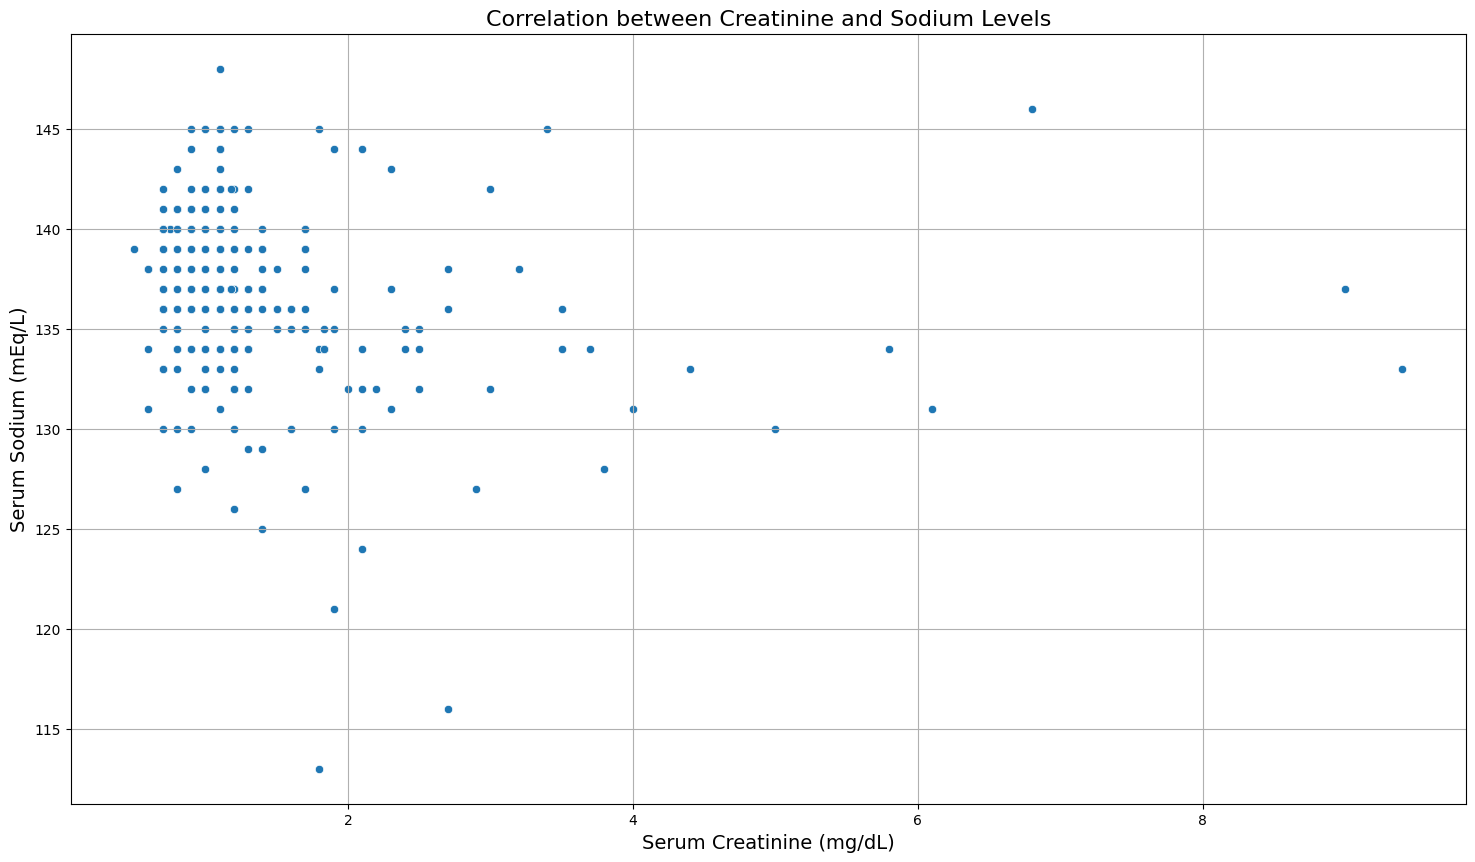

In [141]:
#Plot
plt.figure(figsize=(18,10))
sns.scatterplot(data=df, x='serum_creatinine', y='serum_sodium')
plt.xlabel('Serum Creatinine (mg/dL)', fontsize=14)
plt.ylabel('Serum Sodium (mEq/L)', fontsize=14)
plt.title('Correlation between Creatinine and Sodium Levels', fontsize=16)
plt.grid()
plt.show()

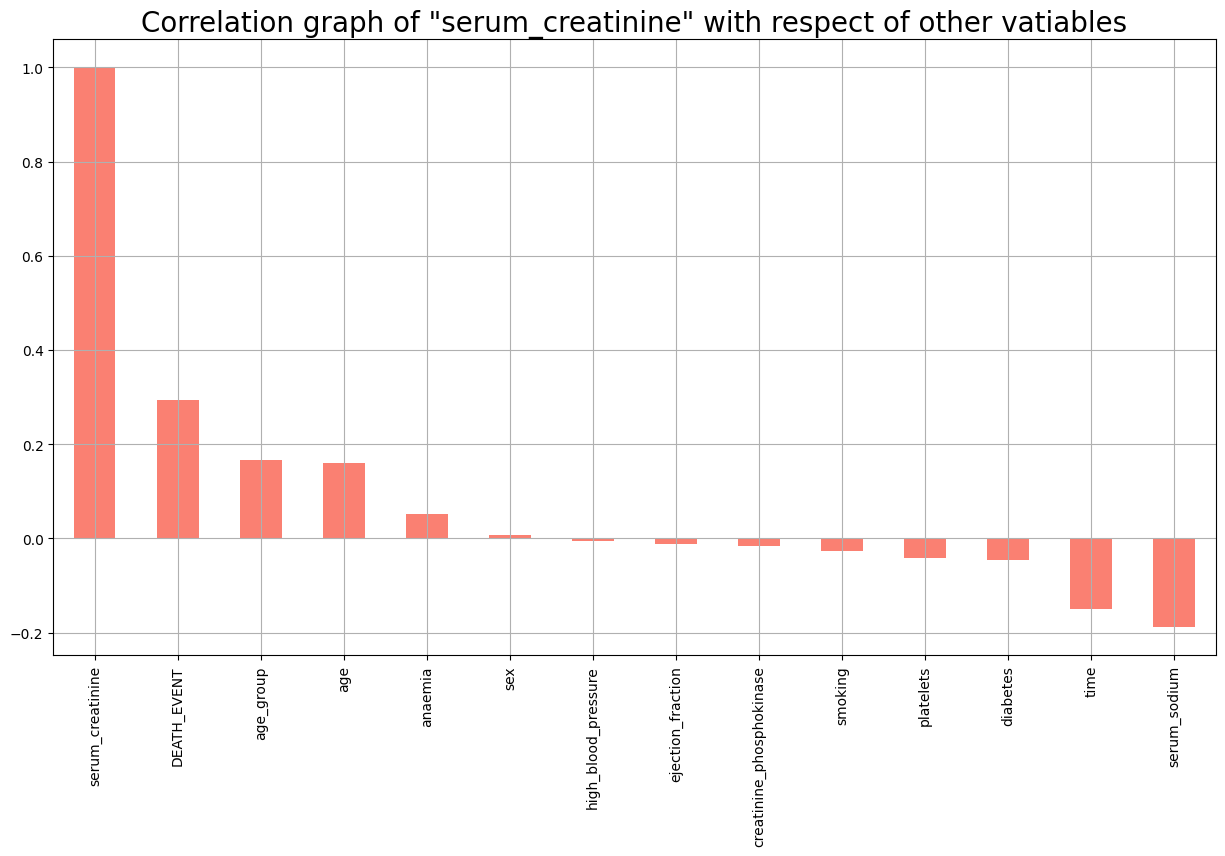

In [142]:
plt.figure(figsize=(15,8))
df.corr()['serum_creatinine'].sort_values(ascending = False).plot(kind='bar', color='salmon')
plt.title('Correlation graph of "serum_creatinine" with respect of other vatiables', fontsize=20)
plt.grid()
plt.show()

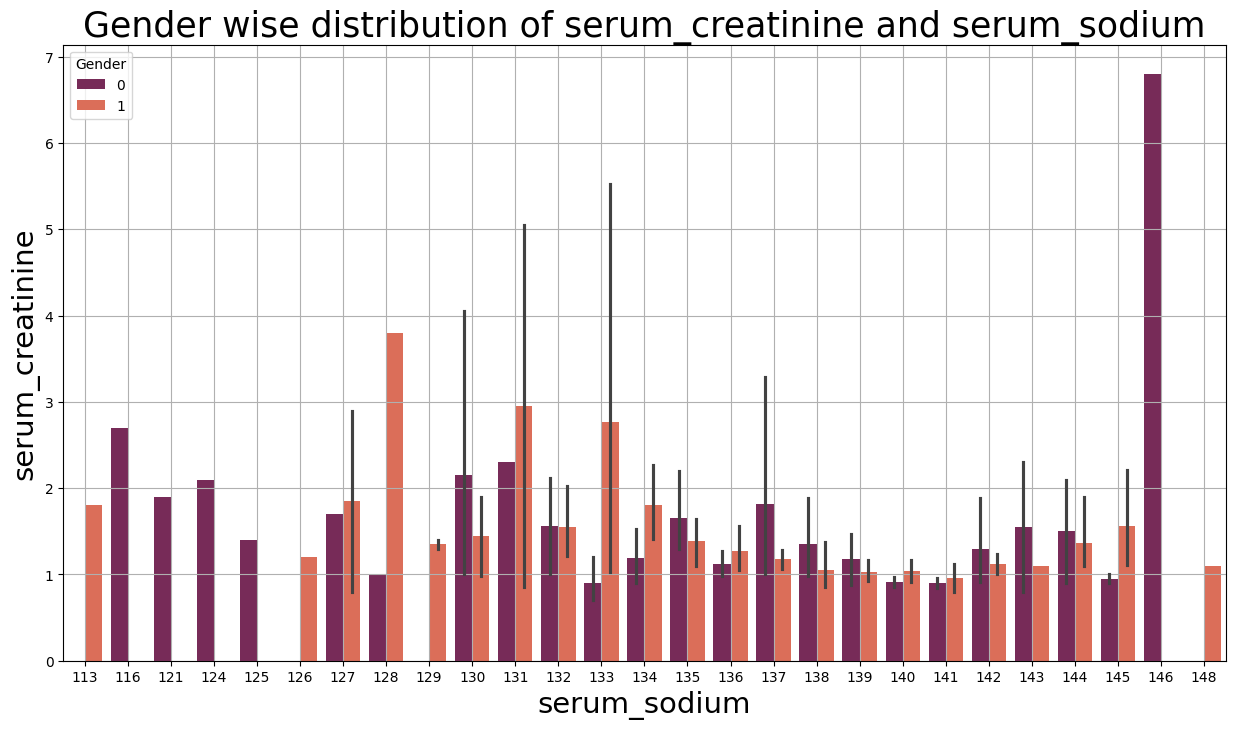

In [143]:
plt.figure(figsize=(15,8))
sns.barplot(y=df['serum_creatinine'], x=df['serum_sodium'],  hue='sex', data=df, palette = "rocket")
plt.title('Gender wise distribution of serum_creatinine and serum_sodium', fontsize=25)
plt.ylabel('serum_creatinine', fontsize=21)
plt.xlabel('serum_sodium', fontsize=21)
plt.grid()
plt.legend(title="Gender")
plt.show()

### 6. How does the prevalence of high blood pressure differ between male and female patients?

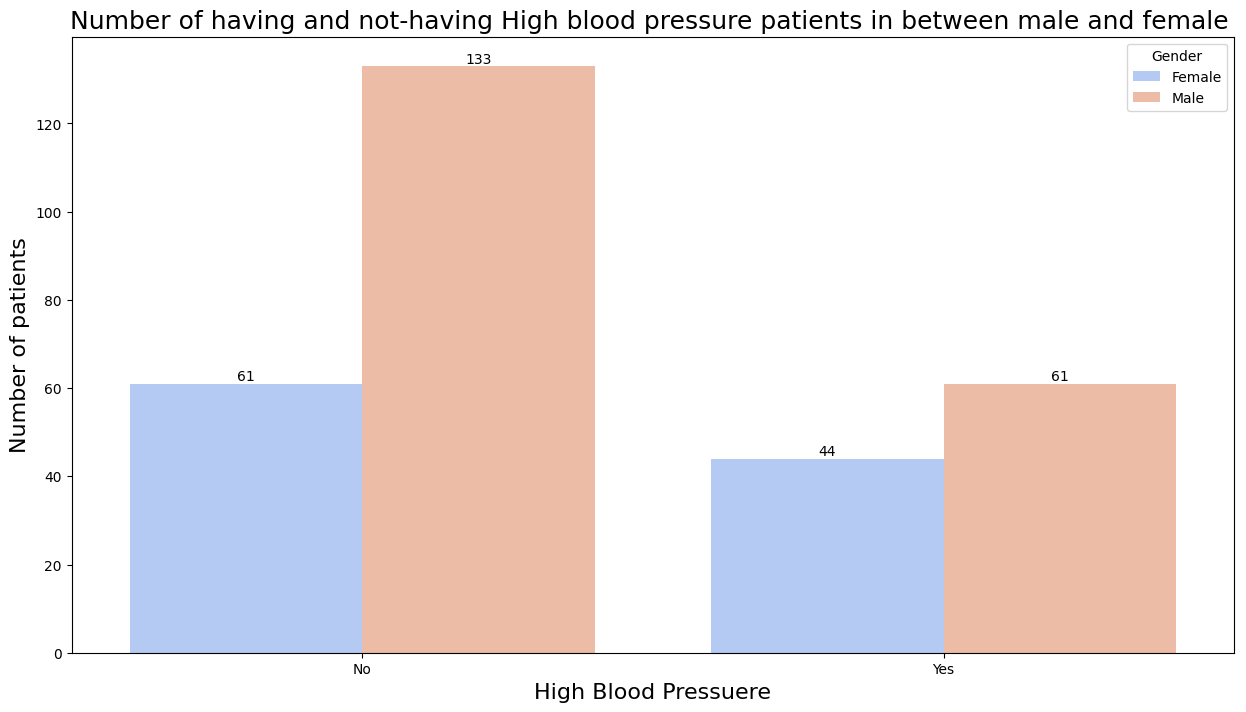

In [144]:
plt.figure(figsize=(15,8))
fig = sns.countplot(x=df['high_blood_pressure'], hue='sex', data=df, palette='coolwarm')
plt.title('Number of having and not-having High blood pressure patients in between male and female ', fontsize=18)
plt.xlabel('High Blood Pressuere', fontsize=16)
plt.ylabel('Number of patients', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(title='Gender', labels=['Female', 'Male'])

for bars in fig.containers:
    fig.bar_label(bars)

plt.show()

In [145]:
df.groupby('sex')['high_blood_pressure'].sum() # female and male patients who are having high blod pressure

sex
0    44
1    61
Name: high_blood_pressure, dtype: int64

In [146]:
df['sex'].value_counts() # count of male and female patients

sex
1    194
0    105
Name: count, dtype: int64

In [147]:
df.groupby('sex')['high_blood_pressure'].sum()/ df['sex'].value_counts()

sex
0    0.419048
1    0.314433
dtype: float64

In [148]:
# Calculating prevalence of high blood pressure by gender
high_bp_count = df.groupby('sex')['high_blood_pressure'].sum()
total_count_gender = df['sex'].value_counts()
prevalence_gender_wise = (high_bp_count / total_count_gender) * 100

# Print prevalence by gender
print("Gender wise Prevalence of High Blood Pressure in %:")
prevalence_gender_wise

Gender wise Prevalence of High Blood Pressure in %:


sex
0    41.904762
1    31.443299
dtype: float64

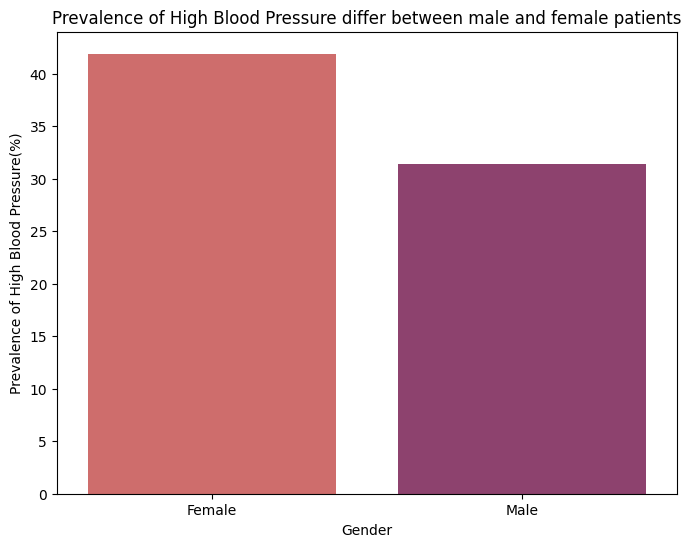

In [149]:
# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=prevalence_gender_wise.index, y=prevalence_gender_wise.values, palette='flare')
plt.xlabel('Gender')
plt.ylabel('Prevalence of High Blood Pressure(%)')
plt.title('Prevalence of High Blood Pressure differ between male and female patients')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

### 7. What is the relationship between smoking habits and the occurrence of heart failure?

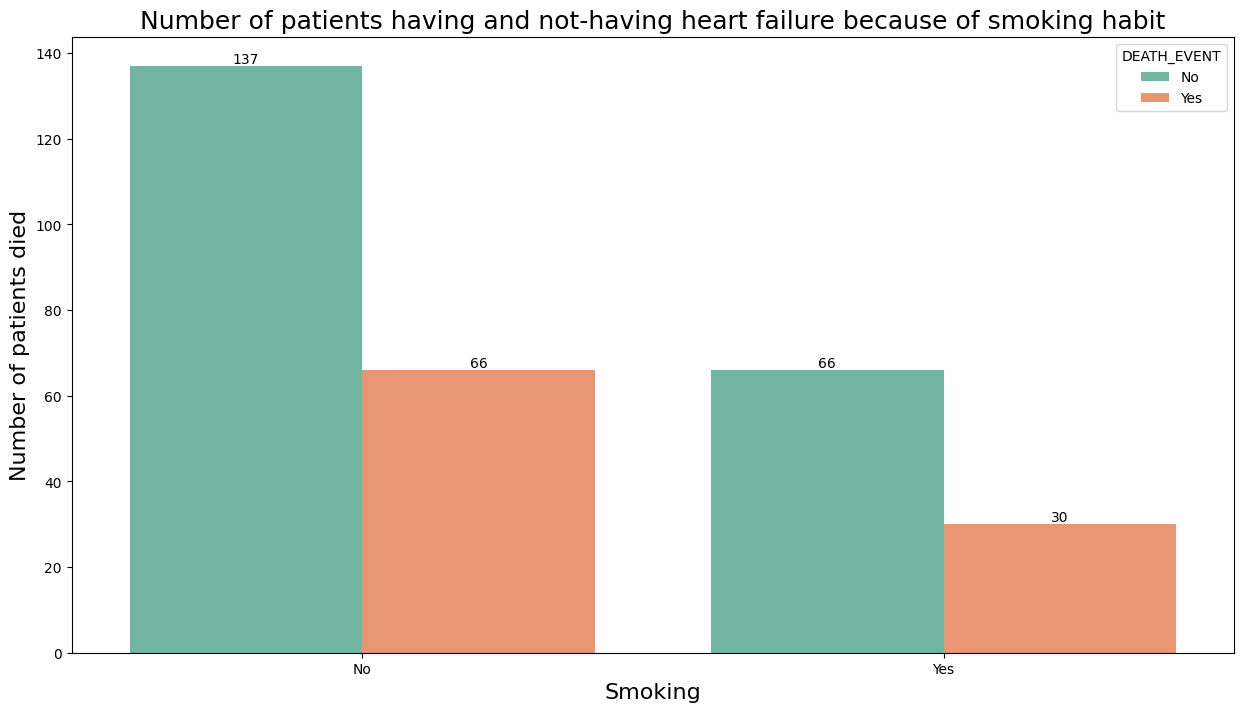

In [150]:
plt.figure(figsize=(15,8))
fig = sns.countplot(x=df['smoking'], hue='DEATH_EVENT', data=df, palette='Set2')
plt.title('Number of patients having and not-having heart failure because of smoking habit', fontsize=18)
plt.xlabel('Smoking', fontsize=16)
plt.ylabel('Number of patients died', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(title='DEATH_EVENT', labels=['No', 'Yes'])

for bars in fig.containers:
    fig.bar_label(bars)


plt.show()

In [151]:
# people for whom smoking is the cause of heart failure.
df.groupby('smoking')['DEATH_EVENT'].sum() 

smoking
0    66
1    30
Name: DEATH_EVENT, dtype: int64

In [152]:
# number of female and male patients who are having smoking habits
df['smoking'].value_counts() 

smoking
0    203
1     96
Name: count, dtype: int64

In [153]:
df.groupby('smoking')['DEATH_EVENT'].sum() / df['smoking'].value_counts()

smoking
0    0.325123
1    0.312500
dtype: float64

In [154]:
# Calculate proportion of heart failure because of smoking 
heart_failure_count = df.groupby('smoking')['DEATH_EVENT'].sum()
total_count_of_smoking = df['smoking'].value_counts()
because_of_smoking = (heart_failure_count / total_count_of_smoking) * 100

print("Occurrence of Heart Failure by the Smoking Habit:")
print(because_of_smoking)

Occurrence of Heart Failure by the Smoking Habit:
smoking
0    32.512315
1    31.250000
dtype: float64


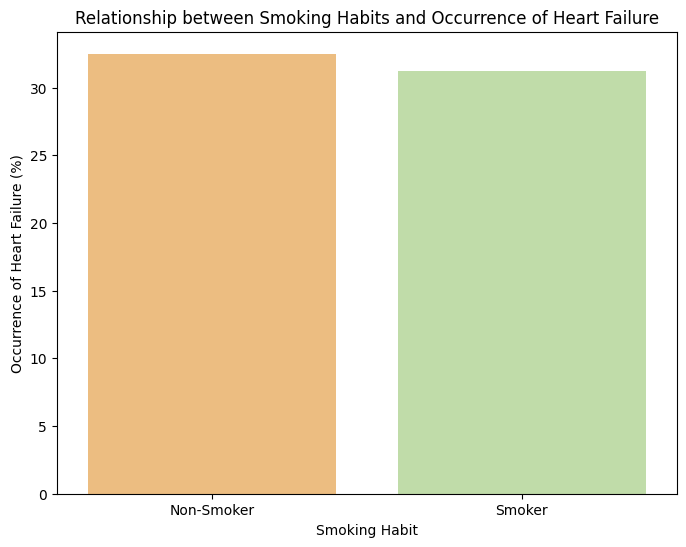

In [155]:
# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=because_of_smoking.index, y=because_of_smoking.values, palette='Spectral')
plt.xlabel('Smoking Habit')
plt.ylabel('Occurrence of Heart Failure (%)')
plt.title('Relationship between Smoking Habits and Occurrence of Heart Failure')
plt.xticks(ticks=[0, 1], labels=['Non-Smoker', 'Smoker'])
plt.show()

### 8. Are there any noticeable patterns in the distribution of death events across different age groups?

In [156]:
df.groupby('age_group')['DEATH_EVENT'].sum() # age group wise sum of death event due to heath failure 

age_group
40.0    11
50.0    20
60.0    27
70.0    20
80.0    13
90.0     5
Name: DEATH_EVENT, dtype: int64

In [157]:
df['age_group'].value_counts() # total patients in the particular age group

age_group
60.0    93
50.0    82
70.0    52
40.0    47
80.0    19
90.0     6
Name: count, dtype: int64

In [158]:
df['age_group'].value_counts() # total patients in the particular age group

age_group
60.0    93
50.0    82
70.0    52
40.0    47
80.0    19
90.0     6
Name: count, dtype: int64

In [159]:
df['age_group'].value_counts() # total patients in the particular age group


age_group
60.0    93
50.0    82
70.0    52
40.0    47
80.0    19
90.0     6
Name: count, dtype: int64

In [160]:
# death event count among age_group 60 and so on
len(df[(df['DEATH_EVENT']==1) & (df['age_group']==60)]) 

27

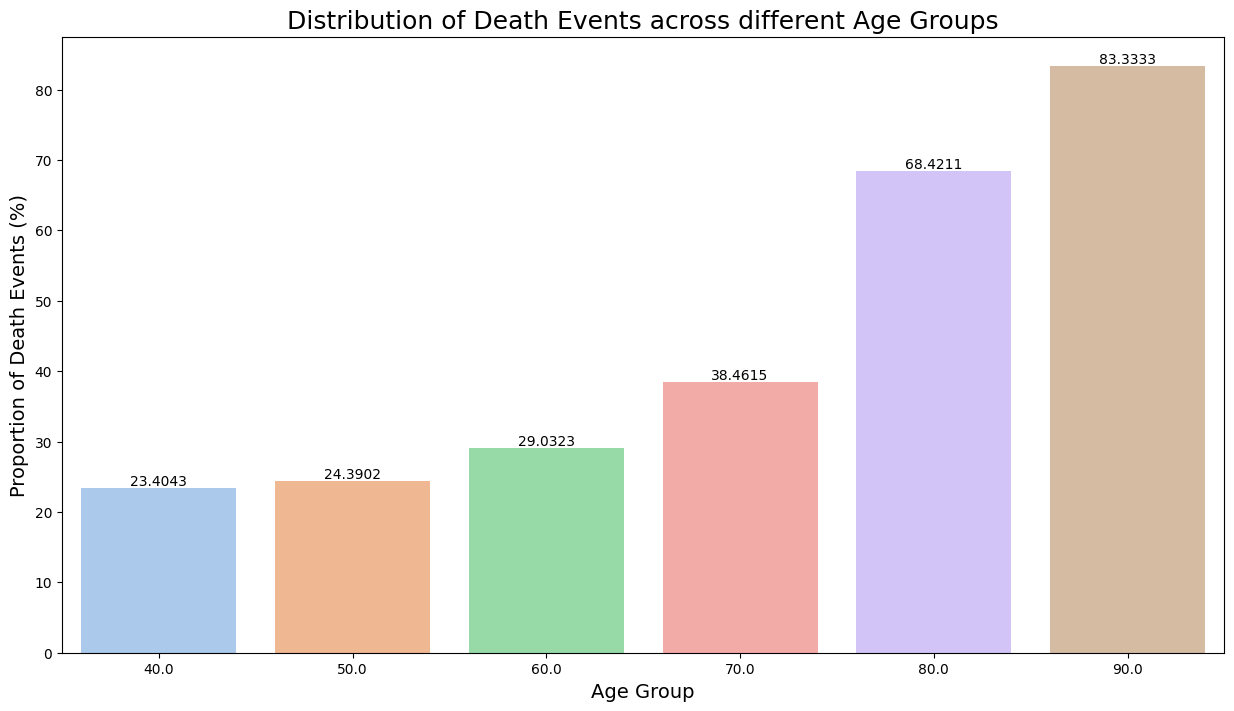

In [161]:
# Calculate proportion of death events by age group
death_event_count = df.groupby('age_group')['DEATH_EVENT'].sum()
total_count_by_age_group = df['age_group'].value_counts()
proportion_by_age_group = (death_event_count / total_count_by_age_group) * 100

# Plot
plt.figure(figsize=(15, 8))
fig = sns.barplot(x=proportion_by_age_group.index, y=proportion_by_age_group.values, palette='pastel')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Proportion of Death Events (%)', fontsize=14)
plt.title('Distribution of Death Events across different Age Groups', fontsize=18)

for bars in fig.containers:
    fig.bar_label(bars)

plt.show()

### 9. Is there any significant difference in ejection fraction between patients with and without diabetes?

In [162]:
df[df['diabetes'] == 0]['ejection_fraction'] # Non diabetic patients

0      20
1      38
2      20
3      20
5      40
       ..
289    38
291    35
295    38
297    38
298    45
Name: ejection_fraction, Length: 174, dtype: int64

In [163]:
df[df['diabetes'] == 1] # Diabetic patients

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_group
4,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1,60.0
7,60.0,1,315,1,60,0,454000.0,1.1,131,1,1,10,1,60.0
19,48.0,1,582,1,55,0,87000.0,1.9,121,0,0,15,1,40.0
21,65.0,1,128,1,30,1,297000.0,1.6,136,0,0,20,1,60.0
23,53.0,0,63,1,60,0,368000.0,0.8,135,1,0,22,0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,45.0,0,615,1,55,0,222000.0,0.8,141,0,0,257,0,40.0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0,50.0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0,60.0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0,60.0


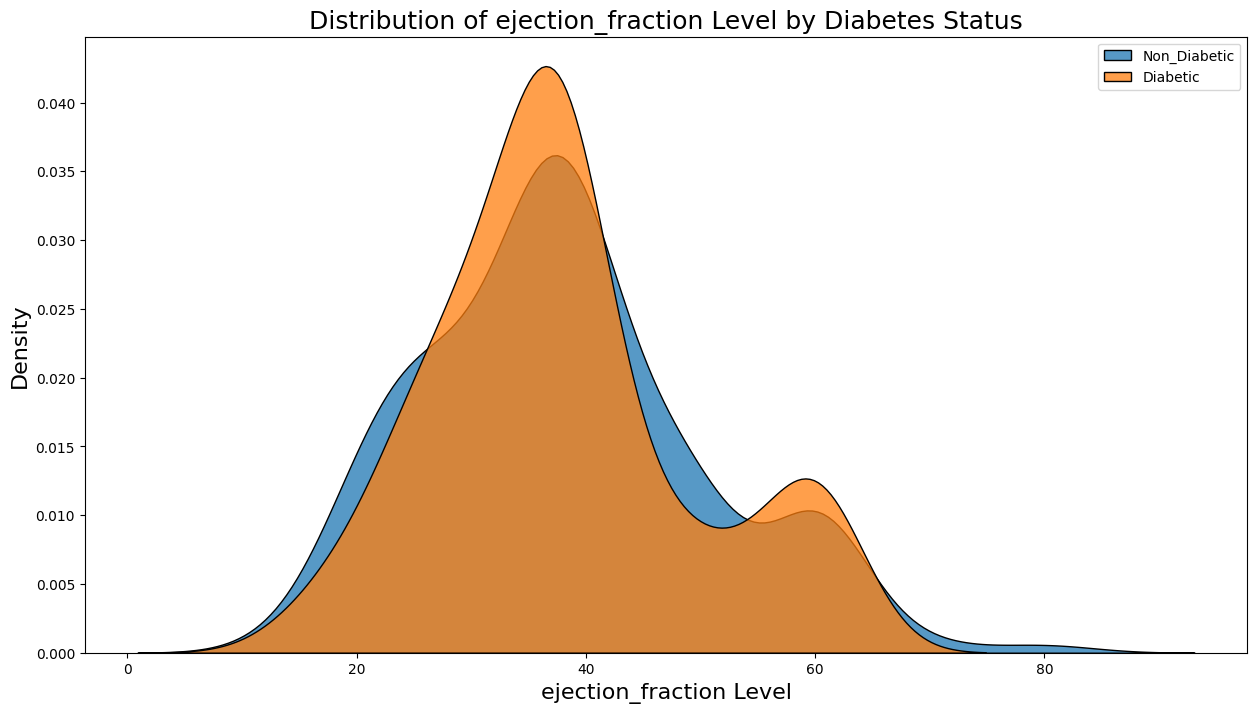

Summary Statistics for ejection_fraction Level:

For Non Diabetic patients:
count    174.000000
mean      38.132184
std       12.247439
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64

For Diabetic patients:
count    125.000000
mean      38.016000
std       11.283719
min       15.000000
25%       30.000000
50%       38.000000
75%       40.000000
max       62.000000
Name: ejection_fraction, dtype: float64


In [164]:
# patients who are diabetic and non diabetic
non_diabetic = df[df['diabetes'] == 0]
diabetic = df[df['diabetes'] == 1]

# Plot
plt.figure(figsize=(15, 8))
sns.kdeplot(non_diabetic['ejection_fraction'], label='Non_Diabetic', multiple="stack")
sns.kdeplot(diabetic['ejection_fraction'], label='Diabetic', multiple="stack")
plt.xlabel('ejection_fraction Level', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.title('Distribution of ejection_fraction Level by Diabetes Status', fontsize=18)
plt.legend()
plt.show()

# Summary statistics
print("Summary Statistics for ejection_fraction Level:")
print("\nFor Non Diabetic patients:")
print(non_diabetic['ejection_fraction'].describe())
print("\nFor Diabetic patients:")
print(diabetic['ejection_fraction'].describe())

### 10. How does the serum creatinine level vary between patients who survived and those who did not?

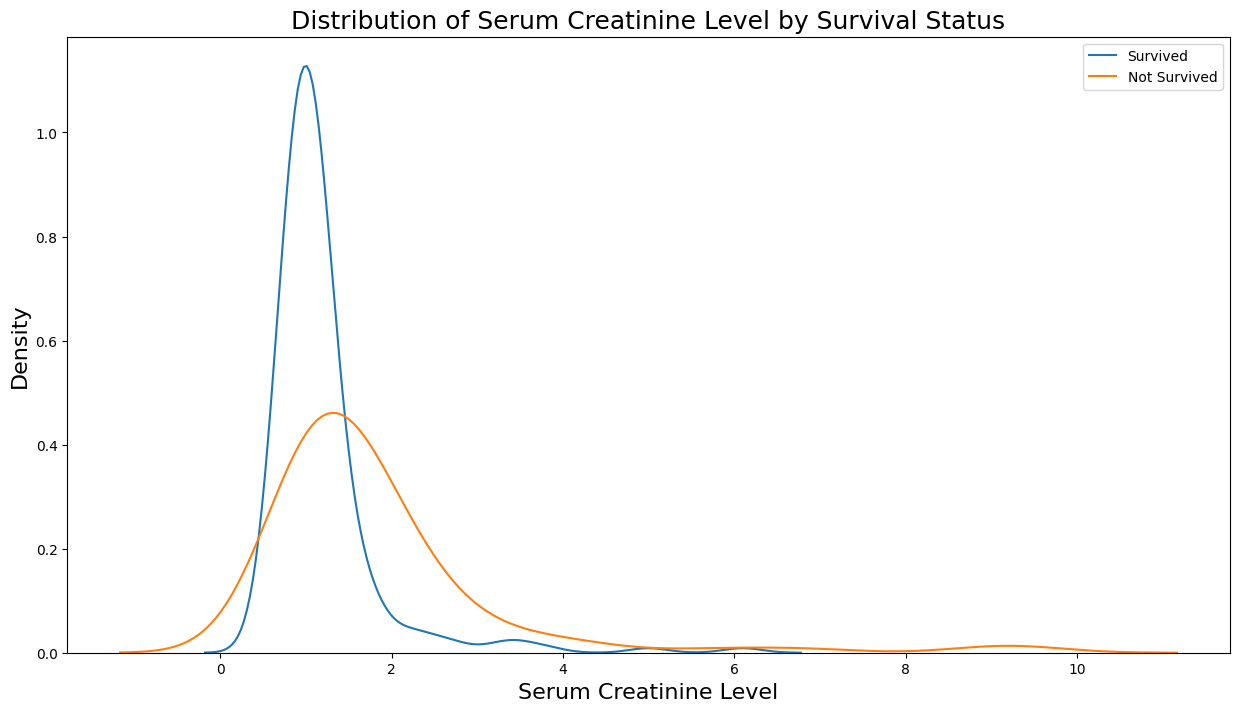

Summary Statistics for Serum Creatinine Level:

Survived:
count    203.000000
mean       1.184877
std        0.654083
min        0.500000
25%        0.900000
50%        1.000000
75%        1.200000
max        6.100000
Name: serum_creatinine, dtype: float64

Not Survived:
count    96.000000
mean      1.835833
std       1.468562
min       0.600000
25%       1.075000
50%       1.300000
75%       1.900000
max       9.400000
Name: serum_creatinine, dtype: float64


In [165]:
# patients who survived and those who did not
survived = df[df['DEATH_EVENT'] == 0]
not_survived = df[df['DEATH_EVENT'] == 1]

# Plot
plt.figure(figsize=(15, 8))
sns.kdeplot(survived['serum_creatinine'], label='Survived')
sns.kdeplot(not_survived['serum_creatinine'], label='Not Survived')
plt.xlabel('Serum Creatinine Level', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.title('Distribution of Serum Creatinine Level by Survival Status', fontsize=18)
plt.legend()
plt.show()

# Summary statistics
print("Summary Statistics for Serum Creatinine Level:")
print("\nSurvived:")
print(survived['serum_creatinine'].describe())
print("\nNot Survived:")
print(not_survived['serum_creatinine'].describe())